In [219]:
def f(x):
    return x**2


def gen(num_examples,datax, datay):
    with open('../dataset/data', 'w') as file:
        for _ in range(num_examples): 

            x = datax[_].tolist()
            y = datay[_].tolist()

            for e in x: print(e, end=' ',file=file)
            print(y[0],file=file)

In [220]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd

num_examples = 100


In [221]:
# # 生成训练数据
x_train = torch.unsqueeze(torch.linspace(-3, 3, num_examples), dim=1)  # 在-1到1之间生成100个点
y_train = 2*x_train.pow(2) - x_train + 2 +0.2 * torch.randn(x_train.size())  # y=x^2 加上一些噪声
# y_train = x_train.pow(3) + 2*x_train.pow(2) - x_train + 2 +0.2 * torch.randn(x_train.size())  # y=x^2 加上一些噪声

# x_train = x_train * 1000000
gen(num_examples, x_train, y_train)

In [222]:
# x_train[0].tolist()

In [223]:
class PolynomialModel(nn.Module):
    def __init__(self):
        super(PolynomialModel, self).__init__()
        self.fc1 = nn.Linear(1, 64)  # 一个输入特征，10个隐藏层神经元
        # self.fc2 = nn.Linear(64, 64)  # 10个隐藏层神经元，一个输出
        self.fc2 = nn.Linear(64, 1)  # 10个隐藏层神经元，一个输出
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        # x = self.relu(self.fc2(x))
        x = self.fc2(x)
        return x

In [224]:


# 实例化模型
model = PolynomialModel()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [225]:
# 训练模型
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 打印训练信息
    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))



Epoch [100/1000], Loss: 0.9764
Epoch [200/1000], Loss: 0.6976
Epoch [300/1000], Loss: 0.5039
Epoch [400/1000], Loss: 0.3728
Epoch [500/1000], Loss: 0.2860
Epoch [600/1000], Loss: 0.2265
Epoch [700/1000], Loss: 0.1849
Epoch [800/1000], Loss: 0.1556
Epoch [900/1000], Loss: 0.1344
Epoch [1000/1000], Loss: 0.1193


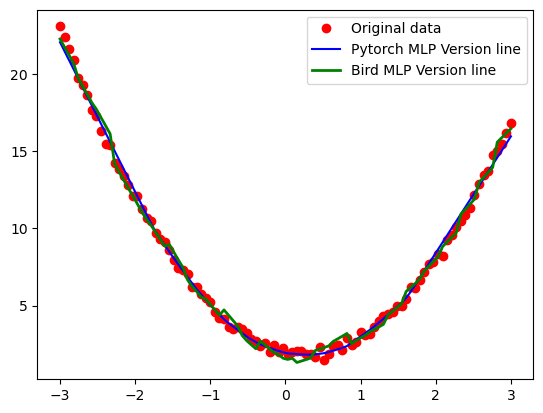

,x,y
0,-3.00000,22.2704
1,-2.93939,21.7433
2,-2.87879,21.2162
3,-2.81818,20.6891
4,-2.75758,19.7229
...,...,...
95,2.75758,13.9538
96,2.81818,15.5894
97,2.87879,15.8809
98,2.93939,16.1724


In [230]:
# 绘制拟合结果
predicted = model(x_train).detach().numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predicted, 'b-', label='Pytorch MLP Version line')

dc = pd.read_csv('../dataset/data.csv',header=None, names=['x','y'], dtype=float,sep=' ')
plt.plot(dc['x'], dc['y'], 'g-', label='Bird MLP Version line', linewidth=2)

plt.legend()
plt.show()


dc

In [227]:
def mse(y, yhat):
    return (y-yhat)**2 *0.5

s = 0
for i in range(100):
    s += float( mse(dc['y'][i], predicted[i]) )
    # print(mse(y_train.numpy()[i], predicted[i]))

s

7.3936000689977845

In [228]:
s = 0
for i in range(100):
    s += float( mse(y_train.numpy()[i], dc['y'][i]) )
    # print(mse(y_train.numpy()[i], predicted[i]))

s

7.965003999055625